## **House Prices Prediction : Exploratory Data Analysis**
---
This project uses the House Prices dataset to build a model for predicting residential property prices.  
Before building a predictive model, it is important to first understand
the structure, characteristics, and relationships between
the features in the dataset.

Therefore, this exploratory data analysis (EDA) is conducted to examine
feature distributions, detect potential outliers, and identify relationships
between variables that may influence house prices.

The dataset consists of numerical and categorical features,
with `SalePrice` as the target variable.

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Load Data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Saving IDs for submission
test_ids = test_data['Id'].copy()

# Show data shapes
print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

# Join train and test data
df = pd.concat([train_data, test_data], axis=0, ignore_index=True)
df.head()

Train shape: (1460, 81)
Test shape: (1459, 80)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal   208500.0  
1   2007        WD         Normal   181500.0  
2   2008        WD         Normal   223500.0  
3   2006        WD        Abnorml   140000.0  
4   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

### **Exploratory Data Analysis (EDA)**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [8]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
Electrical         1
dtype: int64


In [9]:
# Unique values per numeric column
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_unique = df[num_cols].nunique().sort_values(ascending=False)

print("=== Unique Values for Numerical Columns ===")
print(num_unique)

=== Unique Values for Numerical Columns ===
Id               2919
LotArea          1951
GrLivArea        1292
BsmtUnfSF        1135
1stFlrSF         1083
TotalBsmtSF      1058
BsmtFinSF1        991
SalePrice         663
2ndFlrSF          635
GarageArea        603
MasVnrArea        444
WoodDeckSF        379
BsmtFinSF2        272
OpenPorchSF       252
EnclosedPorch     183
LotFrontage       128
ScreenPorch       121
YearBuilt         118
GarageYrBlt       103
YearRemodAdd       61
MiscVal            38
LowQualFinSF       36
3SsnPorch          31
MSSubClass         16
PoolArea           14
TotRmsAbvGrd       14
MoSold             12
OverallQual        10
OverallCond         9
BedroomAbvGr        8
GarageCars          6
Fireplaces          5
YrSold              5
FullBath            5
KitchenAbvGr        4
BsmtFullBath        4
HalfBath            3
BsmtHalfBath        3
dtype: int64


In [10]:
# Unique values per categorical column
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_unique = df[cat_cols].nunique().sort_values(ascending=False)

print("\n=== Unique Values for Categorical Columns ===")
print(cat_unique)


=== Unique Values for Categorical Columns ===
Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
BsmtFinType2      6
Heating           6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
GarageType        6
Foundation        6
Electrical        5
FireplaceQu       5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
ExterCond         5
BldgType          5
BsmtExposure      4
MiscFeature       4
Fence             4
LotShape          4
LandContour       4
BsmtCond          4
KitchenQual       4
ExterQual         4
BsmtQual          4
LandSlope         3
GarageFinish      3
MasVnrType        3
PavedDrive        3
PoolQC            3
Utilities         2
CentralAir        2
Street            2
Alley             2
dtype: int64


In [11]:
# Statistical summary
df.describe(include='all').T

count unique     top  freq          mean           std  \
Id             2919.0    NaN     NaN   NaN        1460.0    842.787043   
MSSubClass     2919.0    NaN     NaN   NaN     57.137718     42.517628   
MSZoning         2915      5      RL  2265           NaN           NaN   
LotFrontage    2433.0    NaN     NaN   NaN     69.305795     23.344905   
LotArea        2919.0    NaN     NaN   NaN   10168.11408   7886.996359   
...               ...    ...     ...   ...           ...           ...   
MoSold         2919.0    NaN     NaN   NaN      6.213087      2.714762   
YrSold         2919.0    NaN     NaN   NaN   2007.792737      1.314964   
SaleType         2918      9      WD  2525           NaN           NaN   
SaleCondition    2919      6  Normal  2402           NaN           NaN   
SalePrice      1460.0    NaN     NaN   NaN  180921.19589  79442.502883   

                   min       25%       50%       75%       max  
Id                 1.0     730.5    1460.0    2189.5    2919.0  
MSSubClass        20.0      20.0      50.0      70.0     190.0  
MSZoning           NaN       NaN       NaN       NaN       NaN  
LotFrontage       21.0      59.0      68.0      80.0     313.0  
LotArea         1300.0    7478.0    9453.0   11570.0  215245.0  
...                ...       ...       ...       ...       ...  
MoSold             1.0       4.0       6.0       8.0      12.0  
YrSold          2006.0    2007.0    2008.0    2009.0    2010.0  
SaleType           NaN       NaN       NaN       NaN       NaN  
SaleCondition      NaN       NaN       NaN       NaN       NaN  
SalePrice      34900.0  129975.0  163000.0  214000.0  755000.0  

[81 rows x 11 columns]

Numeric feature count: 36


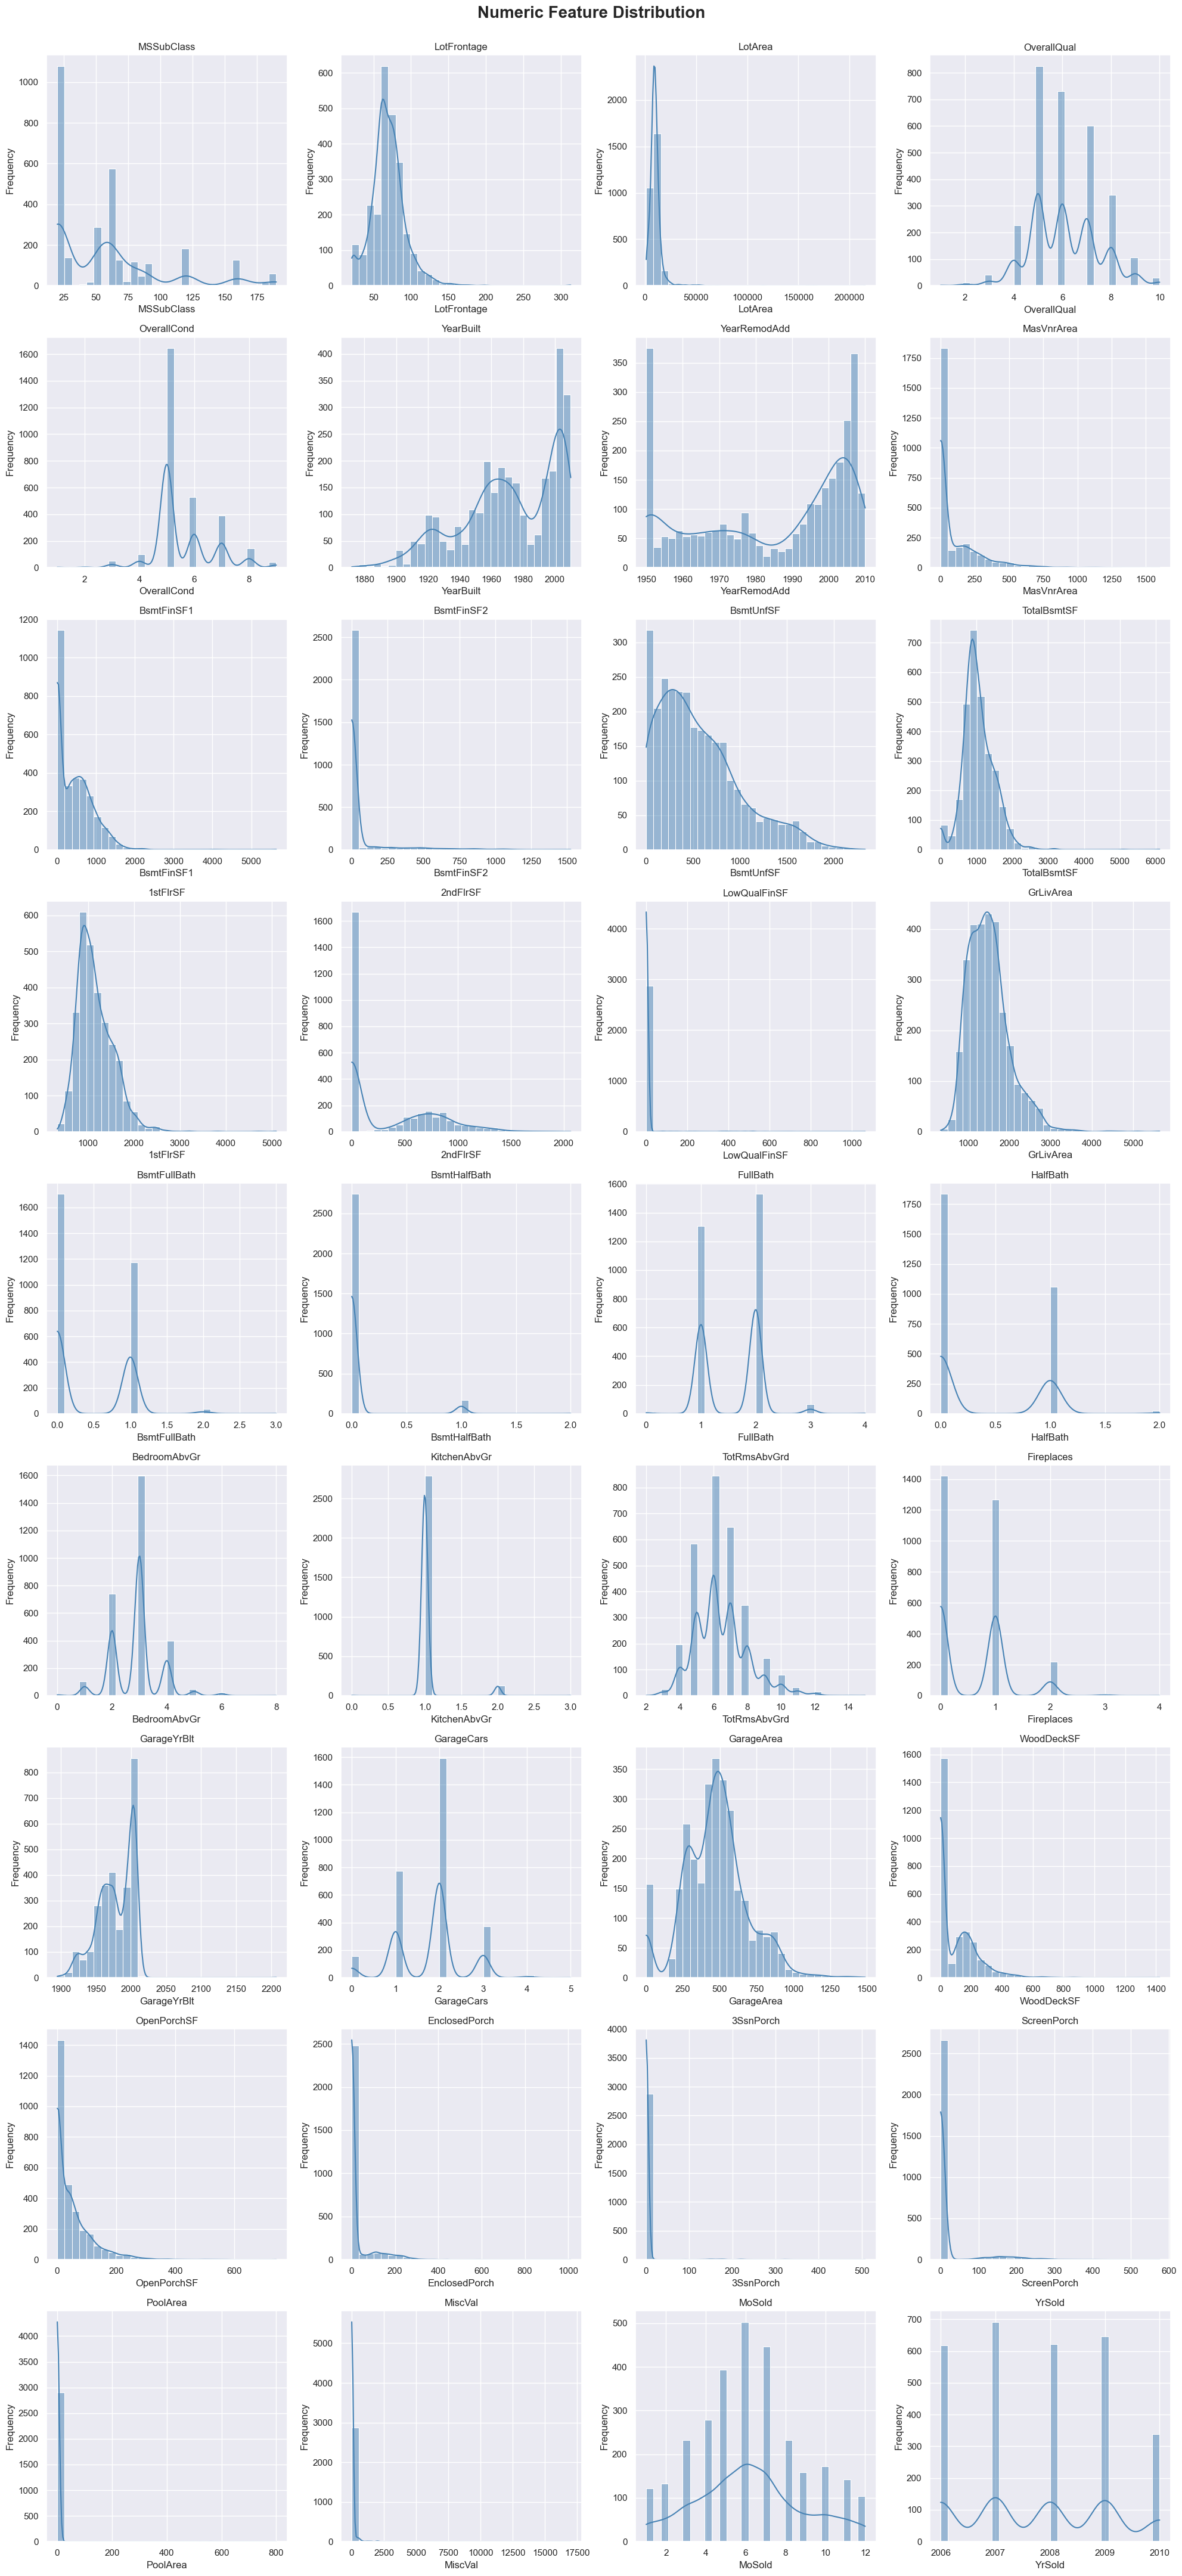

In [22]:
# Numeric feature distribution plots
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['Id', 'SalePrice']]

print(f"Numeric feature count: {len(numeric_cols)}")

n_cols_plot = 4
n_rows_plot = math.ceil(len(numeric_cols) / n_cols_plot)

plt.figure(figsize=(20, 5 * n_rows_plot))
plt.suptitle('Numeric Feature Distribution', fontsize=20, fontweight='bold', y=0.96)

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows_plot, n_cols_plot, i + 1)
    
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    
    plt.title(f'{col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')


for j in range(i + 1, n_rows_plot * n_cols_plot):
    plt.subplot(n_rows_plot, n_cols_plot, j + 1)
    plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Categorical feature count: 43


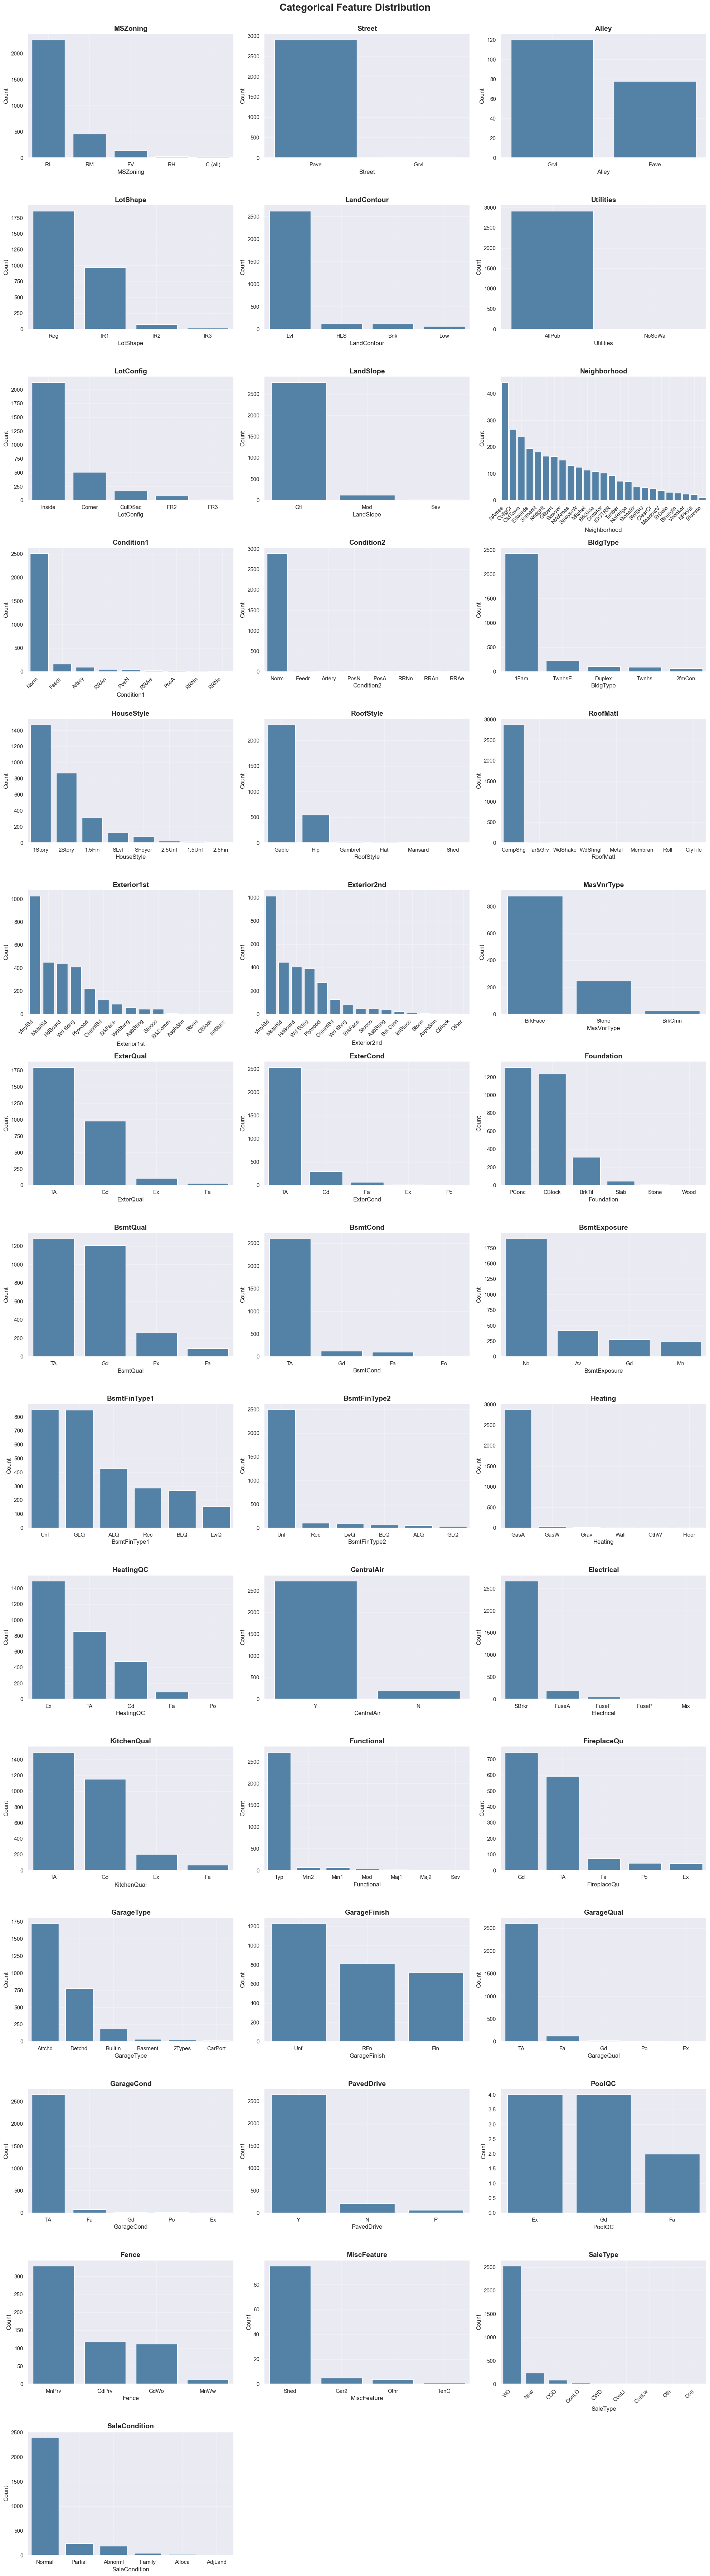

In [28]:
# Categorical feature distribution plots
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical feature count: {len(categorical_cols)}")

n_cols_plot = 3
n_rows_plot = math.ceil(len(categorical_cols) / n_cols_plot)

fig, axes = plt.subplots(nrows=n_rows_plot, ncols=n_cols_plot, figsize=(20, 5 * n_rows_plot))
fig.suptitle('Categorical Feature Distribution', fontsize=20, fontweight='bold', y=0.96)

axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order, ax=ax, color='steelblue')

    if df[col].nunique() > 8:
        ax.tick_params(axis='x', rotation=45)
        for label in ax.get_xticklabels():
            label.set_ha('right')
    else:
        ax.tick_params(axis='x', rotation=0)
        for label in ax.get_xticklabels():
            label.set_ha('center')
    
    ax.set_title(f'{col}', fontsize=14, fontweight='bold')
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.grid(True, alpha=0.3)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

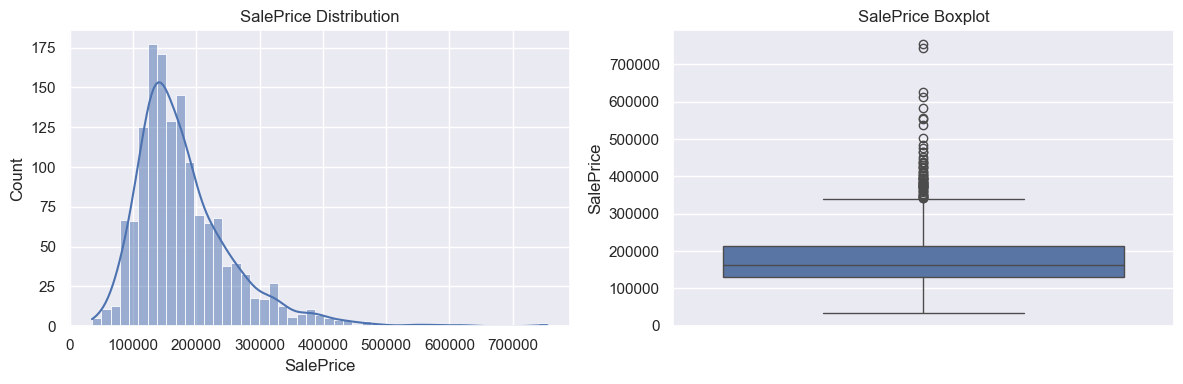

In [ ]:
# SalePrice distribution and boxplot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')

plt.subplot(1, 2, 2)
sns.boxplot(y=train_data['SalePrice'])
plt.title('SalePrice Boxplot')
plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

From the distribution analysis, we found that `SalePrice` has a high positive skewness, indicating many low-priced houses and a small number of high-priced ones.

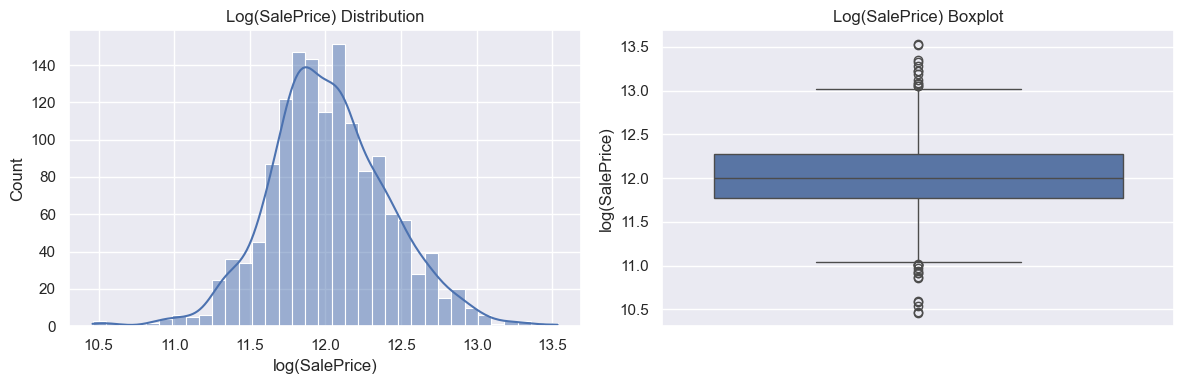

In [ ]:
# Log transformation of SalePrice
train_data['SalePrice_log'] = np.log(train_data['SalePrice'])

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(train_data['SalePrice_log'], kde=True)
plt.title('Log(SalePrice) Distribution')
plt.xlabel('log(SalePrice)')

plt.subplot(1, 2, 2)
sns.boxplot(y=train_data['SalePrice_log'])
plt.title('Log(SalePrice) Boxplot')
plt.ylabel('log(SalePrice)')

plt.tight_layout()
plt.show()

After applying a log transformation, the distribution becomes closer to normal, more symmetric, with fewer outliers and values closer to the median.


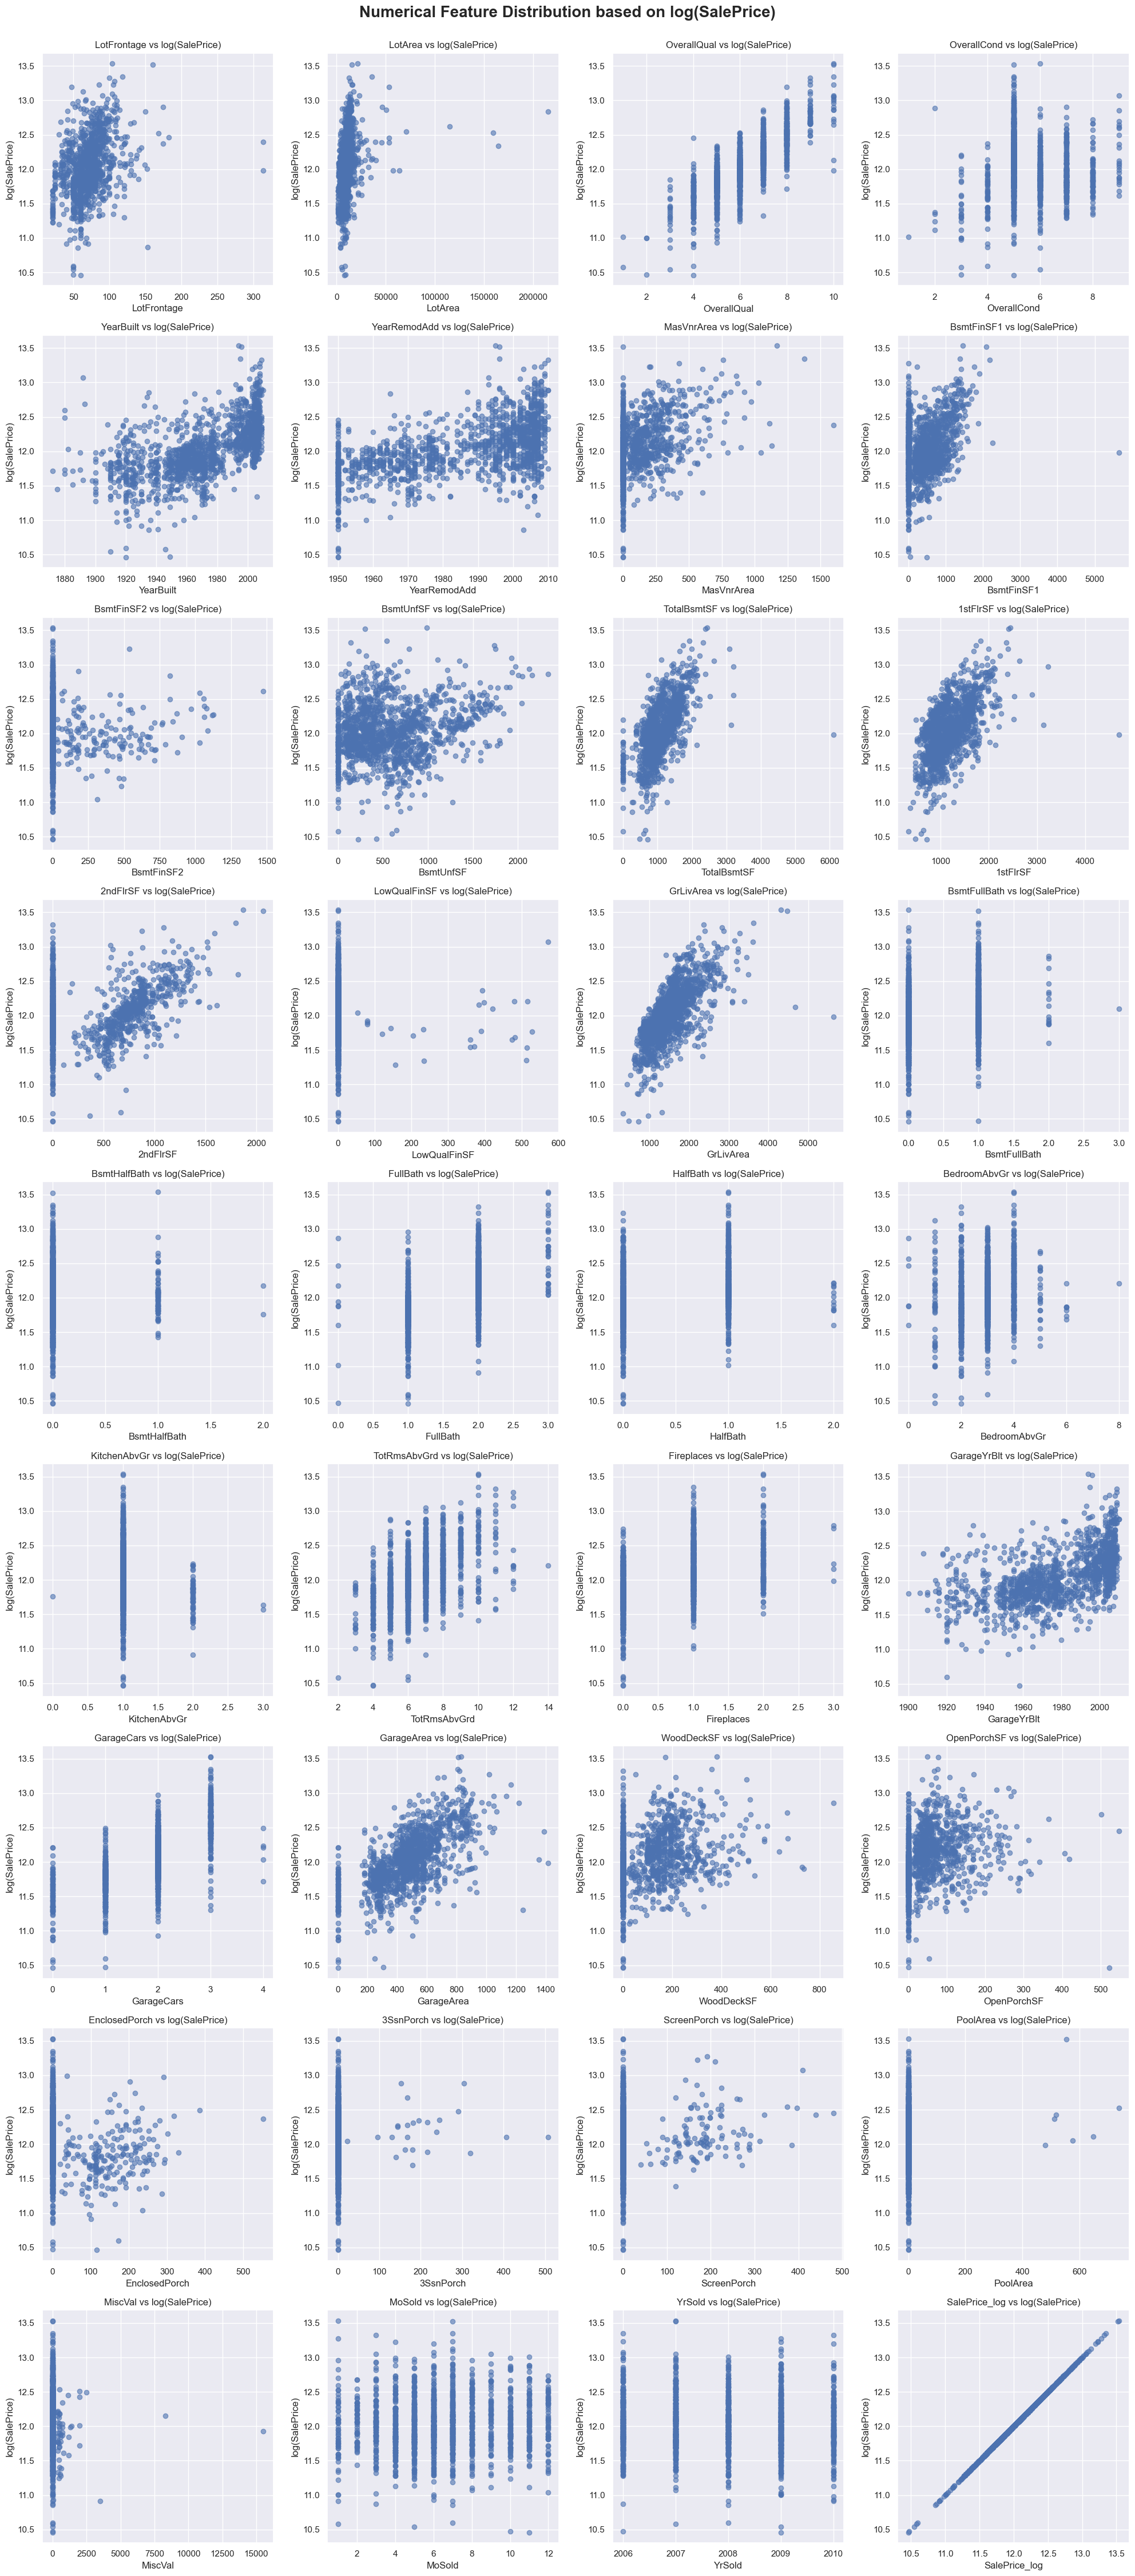

In [ ]:
# Now plot numerical features against log(SalePrice)
train_data['SalePrice_log'] = np.log(train_data['SalePrice'])

num_cols = train_data.select_dtypes(include=[np.number]).columns.drop(['Id', 'SalePrice'])
# Exclude 'MSSubClass' from numerical features since it represents categorical information
num_cols = [col for col in num_cols if col != 'MSSubClass']

n_cols = 4
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.suptitle('Numerical Feature Distribution based on log(SalePrice)', fontsize=20, fontweight='bold', y=1)
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].scatter(train_data[col], train_data['SalePrice_log'], alpha=0.6)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('log(SalePrice)')
    axes[i].set_title(f'{col} vs log(SalePrice)')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

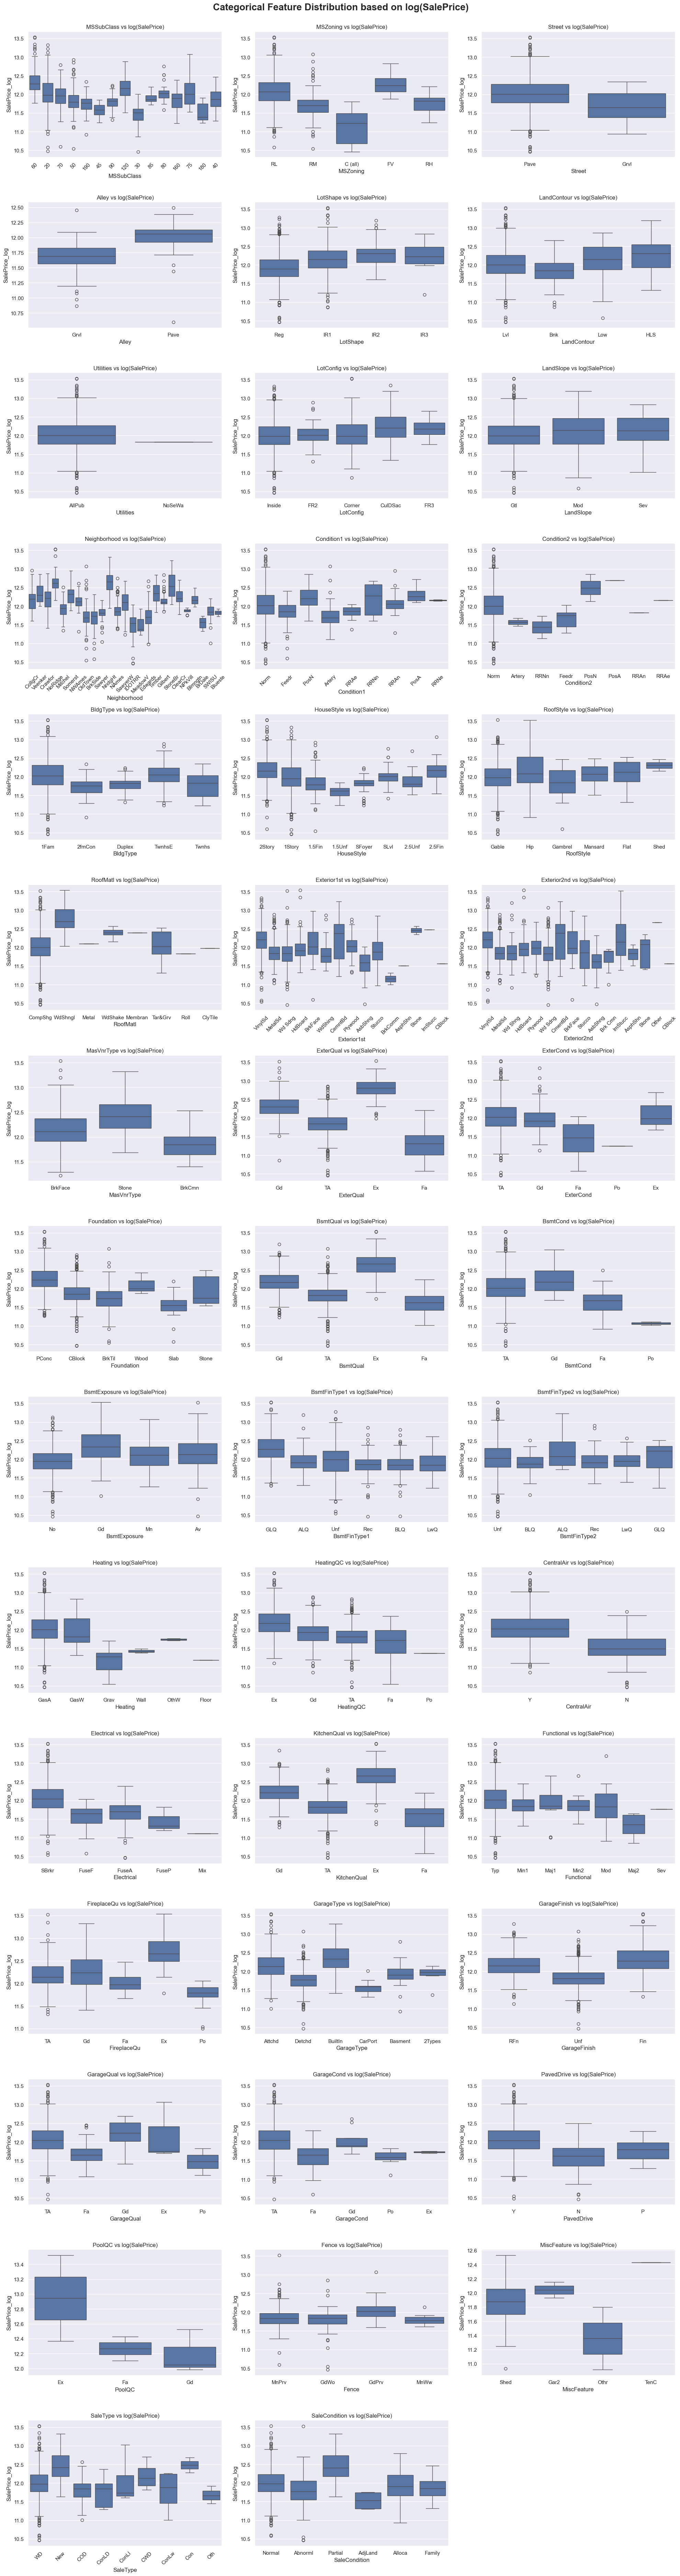

In [ ]:
# Next, plot categorical features against log(SalePrice)
if 'MSSubClass' in train_data.columns:
    train_data['MSSubClass'] = train_data['MSSubClass'].astype(str)
cat_cols = train_data.select_dtypes(include=['object']).columns.tolist()

n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.suptitle('Categorical Feature Distribution based on log(SalePrice)', fontsize=20, fontweight='bold', y=1)
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    sns.boxplot(data=train_data, x=col, y='SalePrice_log', ax=ax)
    if train_data[col].nunique() > 8:
        ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'{col} vs log(SalePrice)')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

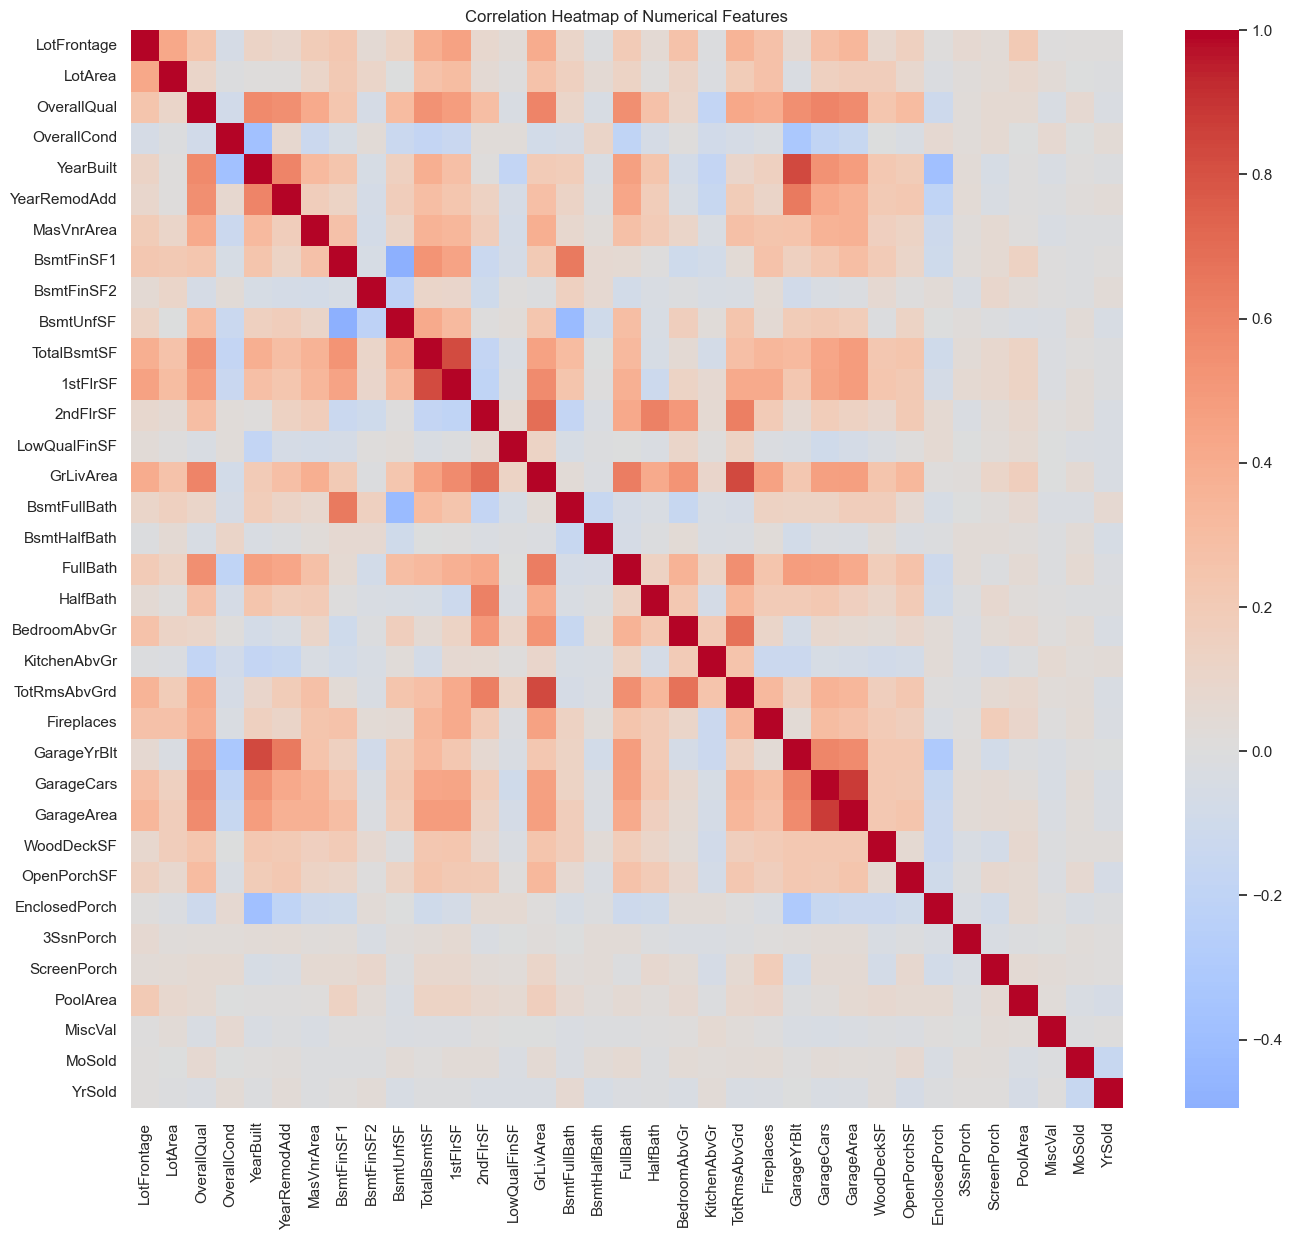

In [61]:
# Corelation heatmap for all numerical features
num_cols_all = [col for col in train_data.select_dtypes(include=[np.number]).columns 
                if col not in ['Id', 'SalePrice', 'SalePrice_log', 'MSSubClass']]

full_corr = train_data[num_cols_all].corr()

plt.figure(figsize=(16, 14))
sns.heatmap(full_corr, cmap='coolwarm', center=0, fmt='.2f', annot=False)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()



### **EDA Summary & Key Findings**

Based on the exploratory data analysis, several important insights were identified:

1. The target variable, `SalePrice`, exhibits a strong positive skew,
   indicating the presence of many lower-priced houses and a smaller number
   of high-priced properties. A logarithmic transformation is therefore
   appropriate to make the distribution more symmetric.

2. Several numerical features contain noticeable outliers,
   particularly those related to property size and area.
   These outliers may influence model performance and should be handled
   carefully during the modeling stage.

3. Features related to house size and quality, such as living area
   and overall quality, show strong relationships with the log-transformed `SalePrice`,
   suggesting they are important predictors.

4. Some categorical variables demonstrate meaningful differences
   in house prices across categories, indicating their potential
   contribution to the predictive model.

These findings provide a foundation for feature engineering
and modeling decisions in the subsequent analysis.   
